<a href="https://colab.research.google.com/github/Aparnasunil15/movies_rating_dataset/blob/main/movies_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('/content/archive (5).zip', encoding='latin-1')
import warnings
warnings.simplefilter(action="ignore")
sns.set_theme(palette=sns.color_palette("muted"),style="darkgrid")
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df["Duration"]=df["Duration"].str.replace(" min","").astype(float)
df["Duration"].head()

0      NaN
1    109.0
2     90.0
3    110.0
4    105.0
Name: Duration, dtype: float64

In [ ]:
df["Year"]=df["Year"].str.strip("()").astype(float)
df["Year"].head()

0       NaN
1    2019.0
2    2021.0
3    2019.0
4    2010.0
Name: Year, dtype: float64

In [ ]:
df["Votes"]=df["Votes"].str.replace(",","")

In [ ]:
df["Votes"]=df["Votes"].str.replace("$5.16M","516",regex=False)

In [ ]:
df["Votes"]=df["Votes"].astype(float)
df["Votes"].head()

0     NaN
1     8.0
2     NaN
3    35.0
4     NaN
Name: Votes, dtype: float64

In [ ]:
df["Duration"].fillna(df["Duration"].median(),inplace=True)

In [ ]:
df["Rating"].fillna(df["Rating"].mean(),inplace=True)

In [ ]:
df["Votes"].fillna(df["Votes"].median(),inplace=True)

In [ ]:
df.dropna(subset=["Genre","Actor 1","Year","Director","Actor 2","Actor 3"],inplace=True)

In [ ]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

**EDA**

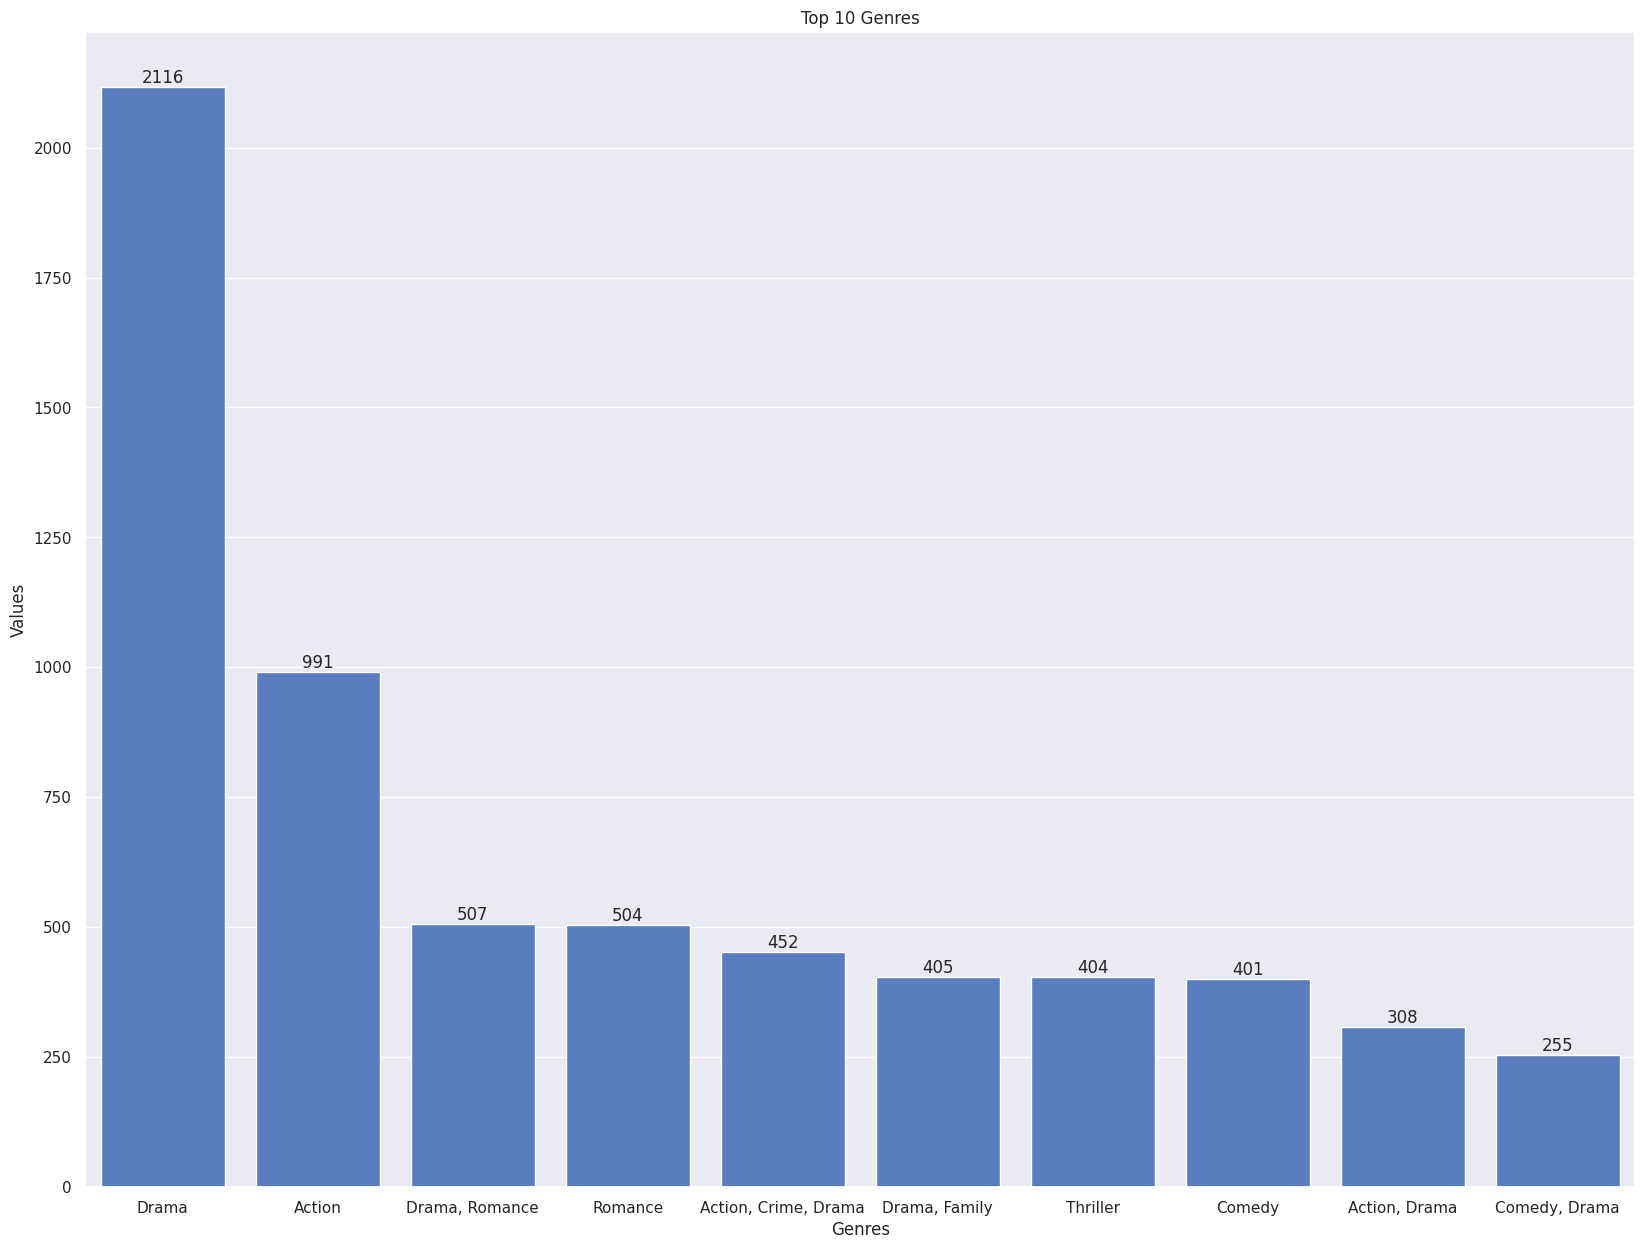

In [ ]:
top10_genres=df["Genre"].value_counts().head(10)
plt.figure(figsize=(20,15))
bar=sns.barplot(x=top10_genres.index,y=top10_genres.values)
bar.bar_label(bar.containers[0])
plt.xlabel("Genres")
plt.ylabel("Values")
plt.title("Top 10 Genres")
plt.show()

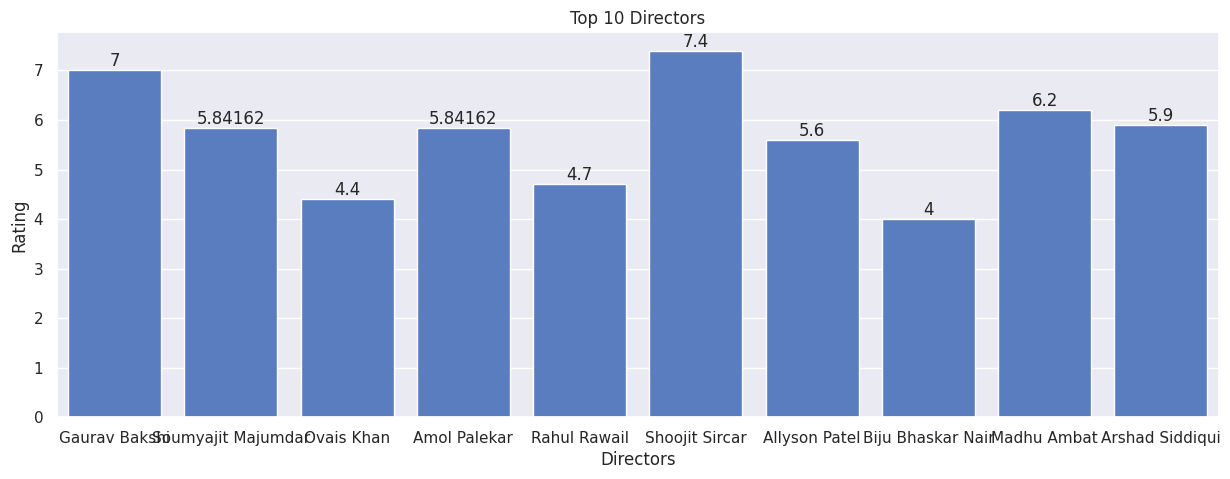

In [ ]:
top10_directors=df["Director"].head(10)
plt.figure(figsize=(15,5))
bar1=sns.barplot(x=top10_directors,y=df["Rating"])
bar1.bar_label(bar1.containers[0])
plt.xlabel("Directors")
plt.ylabel("Rating")
plt.title("Top 10 Directors")
plt.show()

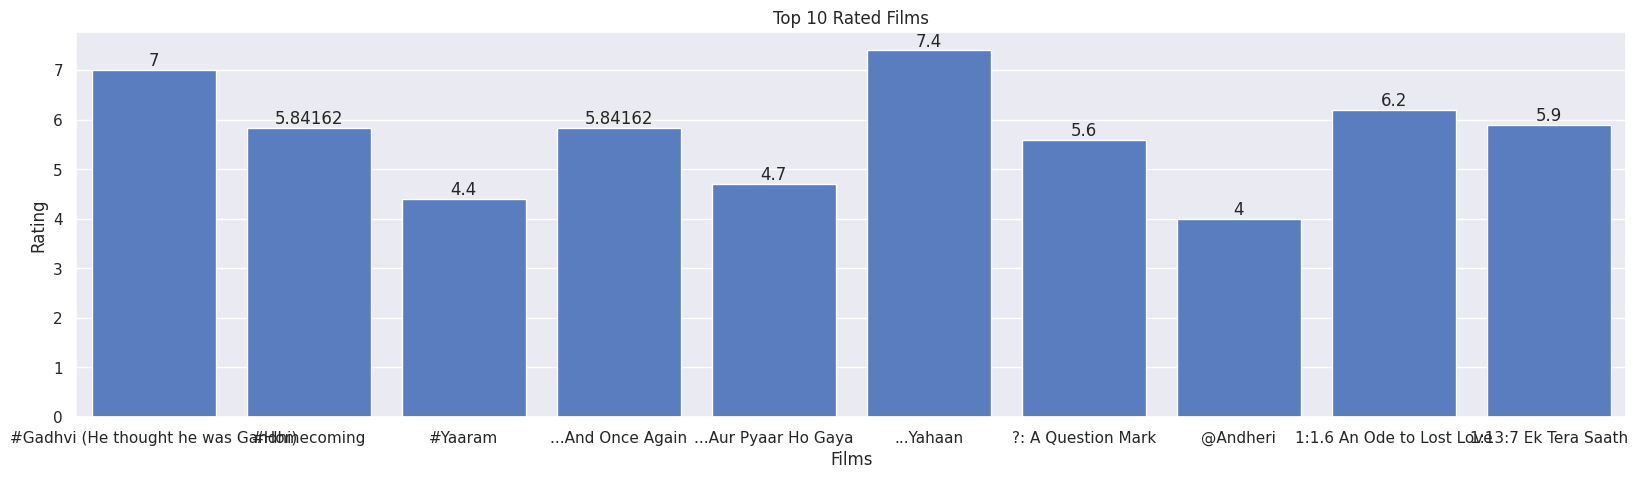

In [ ]:
top10_rated_films=df["Name"].head(10)
plt.figure(figsize=(20,5))
bar2=sns.barplot(x=top10_rated_films,y=df["Rating"])
bar2.bar_label(bar2.containers[0])
plt.xlabel("Films")
plt.ylabel("Rating")
plt.title("Top 10 Rated Films")
plt.show()


In [ ]:
actors=pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
film_count=actors.value_counts
top10_most_performing_actors=actors.value_counts().head(10)

In [ ]:
df["Actor 1"].value_counts().head(10)

Actor 1
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
Rajesh Khanna         122
Dev Anand              93
Shashi Kapoor          91
Akshay Kumar           88
Sanjeev Kumar          83
Name: count, dtype: int64

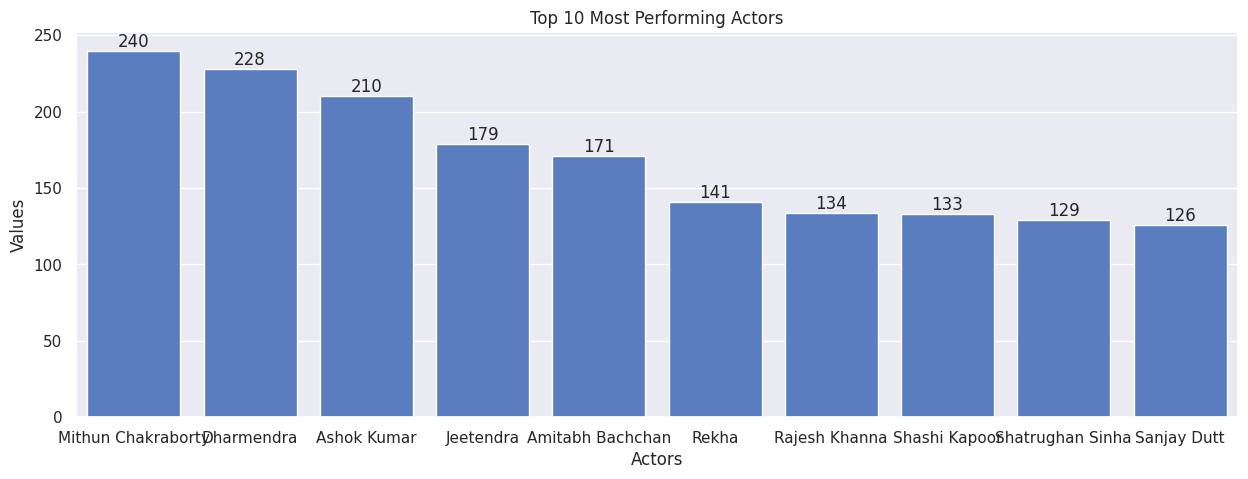

In [ ]:
plt.figure(figsize=(15,5))
bar3=sns.barplot(x=top10_most_performing_actors.index,y=top10_most_performing_actors.values)
bar3.bar_label(bar3.containers[0])
plt.xlabel("Actors")
plt.ylabel("Values")
plt.title("Top 10 Most Performing Actors")
plt.show()

 **FEATURE ENGINEERING**


In [ ]:
features=df.drop("Rating",axis=1)
target=df["Rating"]

In [ ]:
df["Genre"]=df.groupby("Genre")["Rating"].transform("mean")
df["Director"]=df.groupby("Director")["Rating"].transform("mean")
df["Actor 1"]=df.groupby("Actor 1")["Rating"].transform("mean")
df["Actor 2"]=df.groupby("Actor 2")["Rating"].transform("mean")
df["Actor 3"]=df.groupby("Actor 3")["Rating"].transform("mean")
df["Name"]=df.groupby("Name")["Rating"].transform("mean")

In [ ]:
df.drop("Duration",axis=1,inplace=True)

**SPLITTING DATA AND MODEL TRAINING**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

**MEAN SQUARED ERROR**

In [ ]:
mse=mean_squared_error(pred,y_test)
round(mse,2)

0.08

**R2 SCORE**

In [ ]:
score=r2_score(pred,y_test)
round(score,2)

0.94